In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel

In [2]:
# Load the dataset

data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Data Exploration
print("Basic Statistics of the Dataset:")
print(data.describe())

Basic Statistics of the Dataset:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


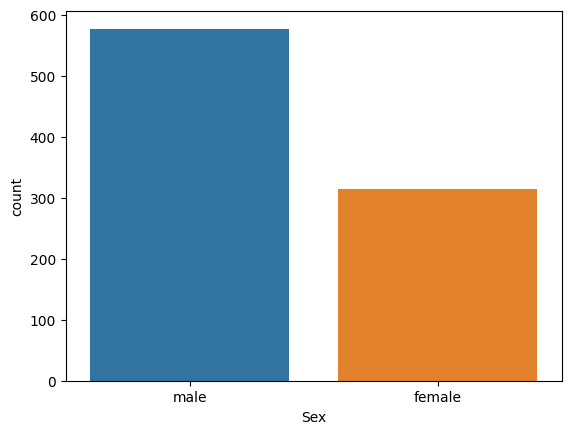

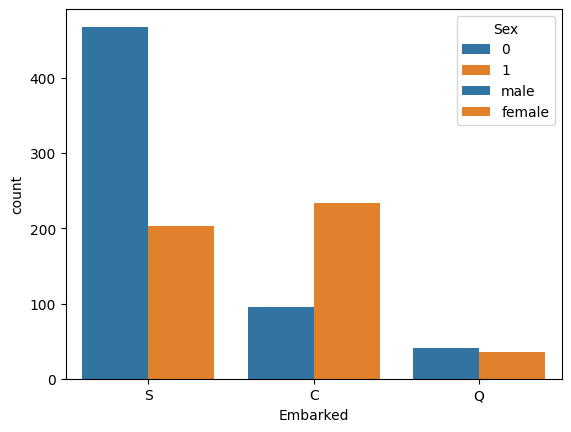

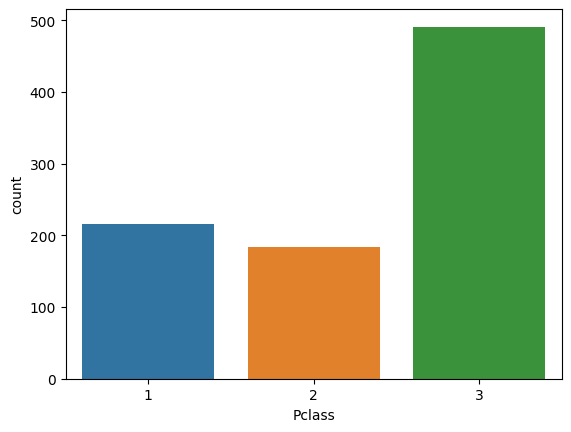

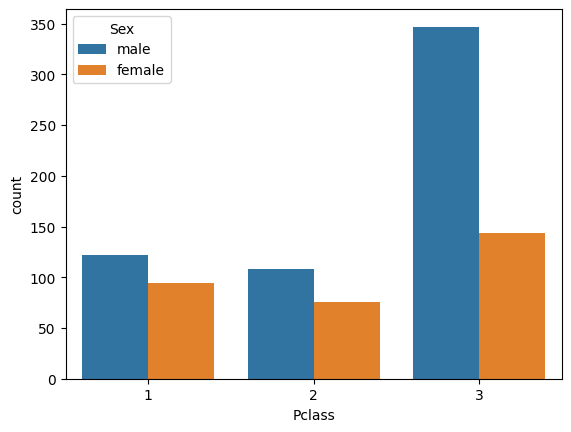

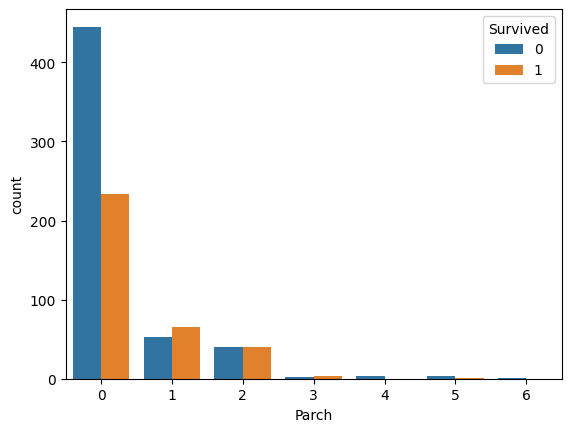

In [4]:
# Visualizing Age and Fare Distributions
sns.countplot(x=data['Sex'])
plt.show()
sns.countplot(x=data['Sex'],hue=data['Survived'])
sns.countplot(x=data['Embarked'],hue=data['Sex'])
plt.show()
sns.countplot(x=data['Pclass'])
plt.show()
sns.countplot(x=data['Pclass'],hue=data['Sex'])
plt.show()
sns.countplot(x=data['Parch'],hue=data['Survived'])
plt.show()

In [5]:
# Data Cleaning
# Handle missing values
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [6]:
# Convert categorical variables into numerical format
label_encoders = {}
categorical_cols = ['Sex', 'Embarked', 'Pclass']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])


In [7]:
# Survival Analysis
print("Overall Survival Rate: {:.2f}%".format(data['Survived'].mean() * 100))
survival_by_gender = data.groupby('Sex')['Survived'].mean()
print("Survival Rate by Gender:")
print(survival_by_gender)
survival_by_class = data.groupby('Pclass')['Survived'].mean()
print("Survival Rate by Class:")
print(survival_by_class)
survival_by_age_group = data.groupby(pd.cut(data['Age'], bins=[0, 18, 35, 50, 80]))['Survived'].mean()
print("Survival Rate by Age Group:")
print(survival_by_age_group)

Overall Survival Rate: 38.38%
Survival Rate by Gender:
Sex
0    0.742038
1    0.188908
Name: Survived, dtype: float64
Survival Rate by Class:
Pclass
0    0.629630
1    0.472826
2    0.242363
Name: Survived, dtype: float64
Survival Rate by Age Group:
Age
(0, 18]     0.503597
(18, 35]    0.353271
(35, 50]    0.398693
(50, 80]    0.343750
Name: Survived, dtype: float64


In [8]:

# Feature Engineering
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
data['Title'] = data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
data['Title'] = data['Title'].map(title_mapping)
data.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)


In [9]:
# Model Building
X = data.drop(['Survived', 'PassengerId'], axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Model Evaluation Metrics:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


Model Evaluation Metrics:
Accuracy: 0.83
Precision: 0.81
Recall: 0.77
F1 Score: 0.79


In [11]:
# Hyperparameter Tuning (Grid Search)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 150}


In [12]:
# Cross-Validation
cv_scores = cross_val_score(grid_search, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)


Cross-Validation Scores: [0.82681564 0.81460674 0.88202247 0.81460674 0.83146067]


In [13]:
# Feature Importance
feature_importances = grid_search.best_estimator_.feature_importances_
features = X.columns
sorted_idx = np.argsort(feature_importances)[::-1]
print("Feature Importance:")
for idx in sorted_idx:
    print(features[idx], ":", feature_importances[idx])


Feature Importance:
Title : 0.2550765311473718
Sex : 0.1970220634661918
Fare : 0.19639751801084215
Age : 0.1339013971196936
Pclass : 0.10550124421674119
FamilySize : 0.08024459142108925
Embarked : 0.03185665461807023


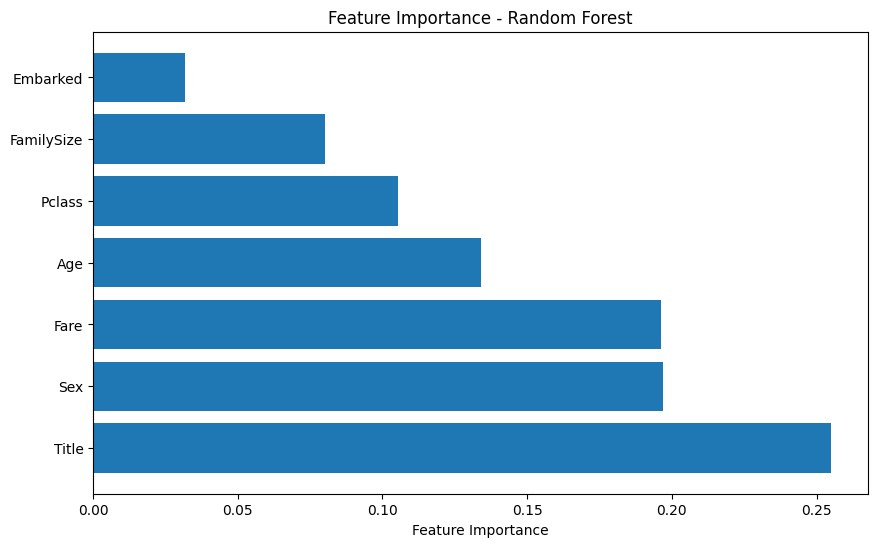

In [14]:
# Visualization and Interpretation
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(features)), np.array(features)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance - Random Forest')
plt.show()
